1a) 

Load the SpotifyFeatures.csv file and report the number of samples (songs) as well as the number of
features (song properties) in the dataset.

Hint: you may use the Python module Pandas and its function read_csv.

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("SpotifyFeatures.csv")
df.shape

(232725, 18)

1b) 

Retrieve all samples belonging to the two genres (Pop and Classical) and create labels for the samples i.e: ’Pop’ = 1, ’Classical’ = 0.   

Report how many samples belongs to the two classes. 

For this dataset you should be able to separate the two classes by using two features, namely ’liveness’ and ’loudness’.

In [3]:
# Assign a new feature --> Assign value 1 if Pop --> Assign value 0 if Classical
df['is_pop'] = np.where(df['genre'] == 'Pop', 1, 0)

# Remove unwanted features
df = df[['genre', 'liveness', 'loudness', 'is_pop']]
# Get all samples that has pop and classical as their genre
df = df[df['genre'].isin(['Pop', 'Classical'])]

# Two separate DataFrames containing Pop and Classical songs
pop_songs = df[df['genre'] == 'Pop']
classical_songs = df[df['genre'] == 'Classical']

print(f"Number of Pop songs: {pop_songs.shape[0]}") # 9386 pop songs (samples)
print(f"Number of Classical songs: {classical_songs.shape[0]}") # 9256 classical songs (samples)


Number of Pop songs: 9386
Number of Classical songs: 9256


1c) Make 2 numpy arrays. 

--> The first array will be the matrix with songs along the rows and songs’ features ("liveness" and "loudness") as columns. This will be the input of our machine learning method.

--> The second array will the vector with the songs’ genre (labels or target we want to learn). 

Create a training and test set by splitting the dataset. Use an 80% 20% split between the training
and test set. Split the data per class so that you keep the same class distribution in the training and test
set

In [4]:

# Randomly shuffling the data separately --> removing original indices and assigning a new one
pop_songs = pop_songs.sample(frac=1, random_state=42).reset_index(drop=True)
classical_songs = classical_songs.sample(frac=1, random_state=42).reset_index(drop=True)

# Creating separate ratios for the two classes to keep the distribution
pop_training_ratio = int(len(pop_songs) * 0.8)
classical_training_ratio = int(len(classical_songs) * 0.8)
print(f"Pop songs training ratio {pop_training_ratio}")
print(f"Classical songs training ratio {classical_training_ratio}")

# Splitting pop data (Training data and testing data)
pop_train = pop_songs.iloc[:pop_training_ratio]
pop_test = pop_songs.iloc[pop_training_ratio:]

# Splitting classical data (Training data and testing data)
classical_train = classical_songs.iloc[:classical_training_ratio]
classical_test = classical_songs.iloc[classical_training_ratio:]


# Adding the training data and the test data together
train_data = pd.concat([pop_train, classical_train]).sample(frac=1, random_state=42).reset_index(drop=True)
test_data = pd.concat([pop_test, classical_test]).sample(frac=1, random_state=42).reset_index(drop=True)

# Separate the features from the labels
X_train = train_data.drop(columns=['is_pop', 'genre']).values
X_test = test_data.drop(columns=['is_pop', 'genre']).values

y_train = train_data['is_pop'].values
y_test = test_data['is_pop'].values



# Save the arrays to .npy files
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)


Pop songs training ratio 7508
Classical songs training ratio 7404


1d) 
Plot he samples on the liveness vs loudness plane, with a different color for each class.

From the plot, will the classification be an easy task? why?





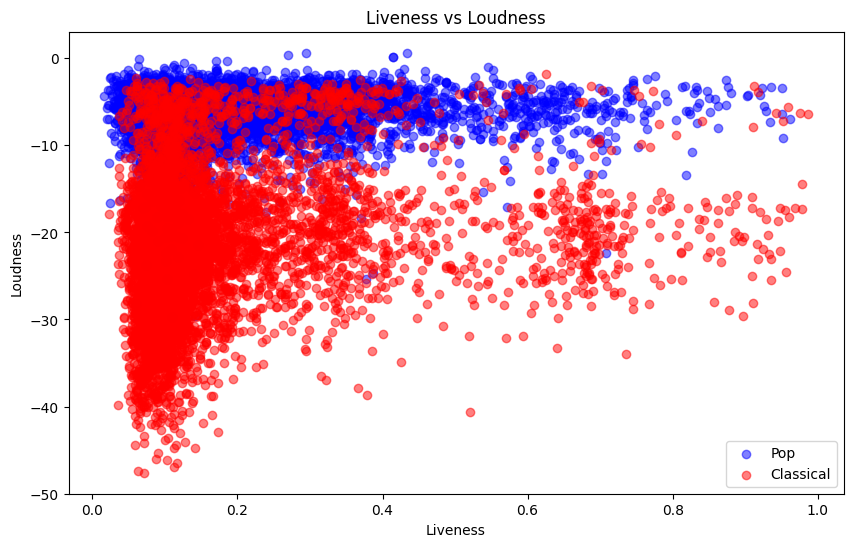

In [6]:
import matplotlib.pyplot as plt

# Get liveness and loudness 
liveness = X_train[:, 0] 
loudness = X_train[:, 1] 

# Setting the size of the graph
plt.figure(figsize=(10, 6))

# plot Pop songs
plt.scatter(liveness[y_train == 1], loudness[y_train == 1], color='blue', label='Pop', alpha=0.5)

# plot Classical songs
plt.scatter(liveness[y_train == 0], loudness[y_train == 0], color='red', label='Classical', alpha=0.5)

# Labels and title
plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Liveness vs Loudness')
plt.legend()

# Show the plot
plt.show()